<a href="https://colab.research.google.com/github/Amnah014/Proyek-Kedua-Membuat-Model-Machine-Learning-dengan-Data-Time-Series/blob/main/Proyek_Kedua_Membuat_Model_Machine_Learning_dengan_Data_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mengimport Library pandas dan Tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
# Membaca file dataset dalam format csv
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/monthly-sunspots.csv')
data

In [ ]:
data = data._convert(numeric=True)
data.isnull().sum()

Month       0
Sunspots    0
dtype: int64

In [ ]:
month = data['Month'].values
sunspots = data['Sunspots'].values

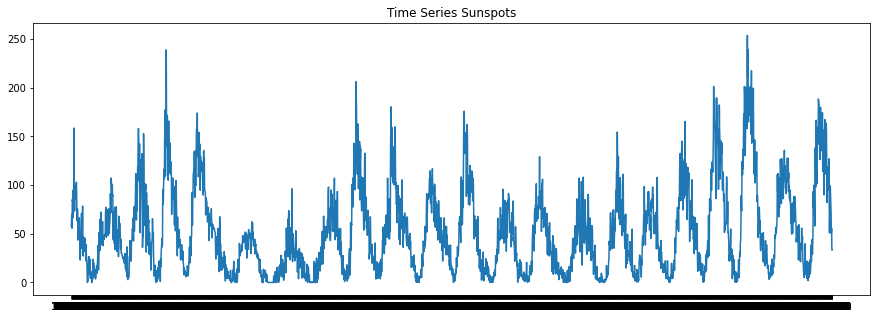

In [ ]:
plt.figure(figsize=(15,5))
plt.plot (month, sunspots)
plt.title ('Time Series Sunspots');

In [ ]:
# Membagi validation menjadi 0.2
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sunspots, month, test_size = 0.2, random_state = 0 , shuffle=False)

print("Nilai Training : ", len(x_train))
print("Nilai Testing/Validation : ", len(x_test))

Nilai Training :  2256
Nilai Testing/Validation :  564


In [ ]:
# Definisi data yang telah di konversi menjadi tipe numpy
def ts_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=1)
  ts = tf.data.Dataset.from_tensor_slices(series)
  ts = ts.window(window_size + 1, shift=1, drop_remainder=True)
  ts = ts.flat_map (lambda w: w.batch (window_size + 1))
  ts = ts.shuffle(shuffle_buffer)
  ts = ts.map(lambda w: (w[:-1], w[-1:]))
  return ts.batch(batch_size).prefetch(1)

In [ ]:
# Model LSTM
trainset = ts_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=5000)
testset = ts_dataset(x_test, window_size=60, batch_size=100, shuffle_buffer=5000)

model = tf.keras.models.Sequential ([
    tf.keras.layers.LSTM(60, return_sequences=True),
    tf.keras.layers.LSTM(60),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1),
    ])

In [ ]:
# Optimizer dengan Learning Rate
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=["mae"])

In [ ]:
# Training
tf.keras.backend.set_floatx('float64')
history = model.fit(trainset, epochs=10, validation_data = testset)

Epoch 1/10
22/22 [==============================] - 9s 241ms/step - loss: 43.4598 - mae: 43.9434 - val_loss: 75.5581 - val_mae: 76.0540
Epoch 2/10
22/22 [==============================] - 4s 192ms/step - loss: 43.0477 - mae: 43.5337 - val_loss: 75.1531 - val_mae: 75.6507
Epoch 3/10
22/22 [==============================] - 4s 195ms/step - loss: 42.6556 - mae: 43.1446 - val_loss: 74.7234 - val_mae: 75.2215
Epoch 4/10
22/22 [==============================] - 4s 192ms/step - loss: 42.2388 - mae: 42.7301 - val_loss: 74.2437 - val_mae: 74.7409
Epoch 5/10
22/22 [==============================] - 4s 192ms/step - loss: 41.7650 - mae: 42.2579 - val_loss: 73.6646 - val_mae: 74.1619
Epoch 6/10
22/22 [==============================] - 4s 192ms/step - loss: 41.1569 - mae: 41.6504 - val_loss: 72.8554 - val_mae: 73.3535
Epoch 7/10
22/22 [==============================] - 4s 190ms/step - loss: 40.3243 - mae: 40.8179 - val_loss: 71.7645 - val_mae: 72.2630
Epoch 8/10
22/22 [==============================

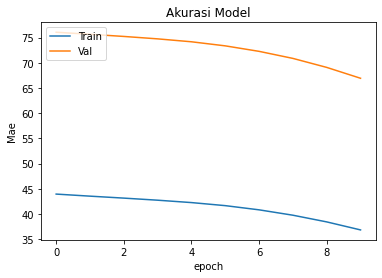

In [ ]:
# Plot Accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Akurasi Model')
plt.ylabel('Mae')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()